강의_6기_AI응용_7차시_01_dcgan.ipynb

## GAN 구현

In [1]:
# GAN 코드
   # 실무에서 사용하지 않기 때문에 주석처리  
'''
# 판별기 학습
def train_discriminator(real_images, generator, discriminator, optimizer_d):
    # 진짜 이미지 판별
    real_output = discriminator(real_images)
    real_loss = F.binary_cross_entropy(real_output, torch.ones_like(real_output))
   
    # 가짜 이미지 생성 및 판별
    z = torch.randn(batch_size, latent_dim)
    fake_images = generator(z)
    fake_output = discriminator(fake_images.detach())
    fake_loss = F.binary_cross_entropy(fake_output, torch.zeros_like(fake_output))
   
    # 전체 손실
    d_loss = real_loss + fake_loss
   
    optimizer_d.zero_grad()
    d_loss.backward()
    optimizer_d.step()
   
# 생성기 학습
def train_generator(generator, discriminator, optimizer_g):
    z = torch.randn(batch_size, latent_dim)
    fake_images = generator(z)
    output = discriminator(fake_images)
   
    # 생성기는 판별기를 속이려고 함
    g_loss = F.binary_cross_entropy(output, torch.ones_like(output))
   
    optimizer_g.zero_grad()
    g_loss.backward()
    optimizer_g.step()
```

---
## 📄 6페이지: DCGAN 소개
### 🏗️ DCGAN(Deep Convolutional GAN)
이제 GAN의 발전된 형태인 **DCGAN**을 배워보겠습니다!
DCGAN은 기본 GAN에 **CNN(Convolutional Neural Network)** 구조를 체계적으로 적용한 모델입니다.
#### 왜 DCGAN이 필요했을까?
기본 GAN의 문제점:
- 학습이 불안정
- 고해상도 이미지 생성이 어려움
- 모드 붕괴(mode collapse) 현상 발생
DCGAN의 해결책:
- **합성곱 층** 사용으로 이미지의 공간적 특징 학습
- **배치 정규화(Batch Normalization)** 로 학습 안정화
- 체계적인 아키텍처 설계 지침 제공

---
## 📄 7페이지: DCGAN 생성기 구조
### 🎨 DCGAN 생성기의 상세 구조
생성기는 작은 노이즈 벡터에서 시작해 점진적으로 이미지를 "키워나가는" 구조입니다.

#### 단계별 과정:

1. **입력 단계**
```
   64차원 노이즈 → 선형 변환 → 16×16×128 특징 맵
```
   - 비유: 작은 씨앗(64차원)을 심어서 첫 새싹(16×16×128) 만들기

2. **업샘플링 1단계**
```
   16×16×128 → 32×32×128
```
   - 전치 합성곱(Transposed Convolution) 사용
   - 크기를 2배로 확대
   - 3×3 커널로 세밀한 특징 추가

3. **업샘플링 2단계**
```
   32×32×128 → 64×64×128
```
   - 다시 2배 확대
   - 더 세밀한 디테일 추가

4. **최종 출력**
```
   64×64×128 → 64×64×3 (RGB)
'''

'\n# 판별기 학습\ndef train_discriminator(real_images, generator, discriminator, optimizer_d):\n    # 진짜 이미지 판별\n    real_output = discriminator(real_images)\n    real_loss = F.binary_cross_entropy(real_output, torch.ones_like(real_output))\n\n    # 가짜 이미지 생성 및 판별\n    z = torch.randn(batch_size, latent_dim)\n    fake_images = generator(z)\n    fake_output = discriminator(fake_images.detach())\n    fake_loss = F.binary_cross_entropy(fake_output, torch.zeros_like(fake_output))\n\n    # 전체 손실\n    d_loss = real_loss + fake_loss\n\n    optimizer_d.zero_grad()\n    d_loss.backward()\n    optimizer_d.step()\n\n# 생성기 학습\ndef train_generator(generator, discriminator, optimizer_g):\n    z = torch.randn(batch_size, latent_dim)\n    fake_images = generator(z)\n    output = discriminator(fake_images)\n\n    # 생성기는 판별기를 속이려고 함\n    g_loss = F.binary_cross_entropy(output, torch.ones_like(output))\n\n    optimizer_g.zero_grad()\n    g_loss.backward()\n    optimizer_g.step()\n```\n\n---\n## 📄 6페이지: DCGAN 

In [2]:
'''
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 64, 3, stride=2, padding=1)
        
        self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        
        self.conv3 = nn.Conv2d(128, 256, 3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        
        self.conv4 = nn.Conv2d(256, 512, 3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        
        self.fc = nn.Linear(512*4*4, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2)
        x = F.leaky_relu(self.bn4(self.conv4(x)), 0.2)
        
        x = x.view(x.size(0), -1)  # flatten
        x = torch.sigmoid(self.fc(x))
        
        return x
'''

'\nclass Discriminator(nn.Module):\n    def __init__(self):\n        super().__init__()\n\n        self.conv1 = nn.Conv2d(3, 64, 3, stride=2, padding=1)\n\n        self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)\n        self.bn2 = nn.BatchNorm2d(128)\n\n        self.conv3 = nn.Conv2d(128, 256, 3, stride=2, padding=1)\n        self.bn3 = nn.BatchNorm2d(256)\n\n        self.conv4 = nn.Conv2d(256, 512, 3, stride=2, padding=1)\n        self.bn4 = nn.BatchNorm2d(512)\n\n        self.fc = nn.Linear(512*4*4, 1)\n\n    def forward(self, x):\n        x = F.leaky_relu(self.conv1(x), 0.2)\n        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2)\n        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2)\n        x = F.leaky_relu(self.bn4(self.conv4(x)), 0.2)\n\n        x = x.view(x.size(0), -1)  # flatten\n        x = torch.sigmoid(self.fc(x))\n\n        return x\n'

## DCGAN 구현

In [3]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

import torchvision.transforms as transforms
from torchvision.utils import save_image
from torchvision import datasets


In [4]:
num_eps=1
bsize=32
lrate=0.001

# 잠재 공간(latent space)의 차원(dimension)을 64로 설정함. (생성 모델의 입력 크기)
lat_dimension=64
image_sz=64
chnls=1
# 학습 진행 상황을 로그로 출력할 간격(미니 배치 수)을 200으로 설정함.
logging_intv=200


In [5]:
# GAN 생성자(Generator) 클래스 정의
class GANGenerator(nn.Module):
    def __init__(self):
        super(GANGenerator, self).__init__()
        # 선형 레이어의 출력 해상도를 계산(예: 64*64 image 1/4 크기 >> 16)
        self.inp_sz = image_sz // 4
        # 첫 번째 레이어: 잠재공간(lat_dimension)을 (128*inp_sz) 크기 벡터로 변환하는 선형 레이어 정의
        self.lin = nn.Linear(lat_dimension, 128*self.inp_sz*self.inp_sz)
        # 선형 레이어 출력 >> 배치정규화
        self.bn1 = nn.BatchNorm2d(128)
        # 이미지 해상도를 2배로 업샘플링
        self.up1 = nn.Upsample(scale_factor=2)
        # 채널 128 개 유지하는 3*3 커널 이용, 합성곱 레이어 정의
        self.cn1 = nn.Conv2d(128, 128, 3, stride=1, padding=1)
        # 배치정규화 레이어 정의 (momentum=0.8 사용)
        self.bn2 = nn.BatchNorm2d(128, 0.8)
        # Leaky Relu 활성화 함수 정의 (음수 기울기 0.2 사용)
        self.rl1 = nn.LeakyReLU(0.2, inplace=True)
        # 이미지 해상도를 2배로 업샘플링
        self.up2 = nn.Upsample(scale_factor=2)
        # 채널을 128 >> 64개로 줄이는 3*3 합성곱 레이어 정의
        self.cn2 = nn.Conv2d(128, 64, 3, stride=1, padding=1)
        # 배치정규화 레이어 정의 (momentum=0.8 사용)
        self.bn3 = nn.BatchNorm2d(64, 0.8)
        # Leaky Relu 활성화 함수 정의 (음수 기울기 0.2 사용)
        self.rl2 = nn.LeakyReLU(0.2, inplace=True)
        # 최종 채널 수를 chnls(1개)로 만드는 3*3 합성곱 레이어 정의
        self.cn3 = nn.Conv2d(64, chnls, 3, stride=1, padding=1)
        # 최종 출력 이미지 픽셀값을 [-1,1] 범위로 제한 : Tahn 활성화 함수
        self.act = nn.Tanh()

    def forward(self, x):
        # 선형 레이어 통과
        x = self.lin(x)
        # 텐서를 (배치 크기, 채널, 높이, 너비) 4차원 형태로 재구성
        x = x.view(x.shape[0], 128, self.inp_sz, self.inp_sz)
        # 배치 정규화 1을 통화
        x = self.bn1(x)
        # 업샘플링 1 통과 >> 해상도 2배
        x = self.up1(x)
        # 합성곱 1 통과
        x = self.cn1(x)
        # 배치 정규화 2을 통과
        x = self.bn2(x)
        # Leaky Relu 통과
        x = self.rl1(x)
        # 업샘플링 2 >> 해상도 2배
        x = self.up2(x)
        # 합성곱 2 통과
        x = self.cn2(x)
        # 배치 정규화 3을 통과
        x = self.bn3(x)
        # Leaky Relu 통과
        x = self.rl2(x)
        # 최종 합성곱 레이어 3 통과
        x = self.cn3(x)
        # Tanh 활성화 함수 통과 >> 최종 출력(out)
        out = self.act(x)
        return out

In [6]:
# GAN 판별자 클래스 정의
class GANDiscriminator(nn.Module):
    def __init__(self):
        super(GANDiscriminator, self).__init__()
        # 합성곱, leaky relu, dropout >> 하나의 판별모듈 정의하는 헬퍼함수
        def disc_module(ip_chnls, op_chnls, bnorm=True):
            # downsampling : stride = 2
            mod = [nn.Conv2d(ip_chnls, op_chnls, 3, 2, 1),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout2d(0.3)]
            # 배치 정규화(bnorm)가 요청된 경우 모듈에 추가
            if bnorm:
                mod += [nn.BatchNorm2d(op_chnls)]
            return mod

        # 판별모듈을 연결하여 판별자 모델의 특징 추출부(disc_model) 구성
        self.disc_model = nn.Sequential(
            # 첫 번째 모듈 : 입력채널(chnls)을 16개로 만듦, 배치정규화 사용X
            *disc_module(chnls, 16, bnorm=False),
            *disc_module(16, 32),
            *disc_module(32, 64),
            *disc_module(64, 128)
        )
        # 4번의 다운샘플링 후 최종 해상도 계산
        ds_size = image_sz // 2 ** 4

        # 특징맵을 단일 확률값으로 변환하는 최종레이어 정의
        self.adverse_lyr = nn.Sequential(
            nn.Linear(128 * ds_size * ds_size, 1),
            # 입력값 128 * ds_size * ds_size
            # >> featuremap을 하나의 벡터값으로 출력 (평탄화)
            nn.Sigmoid() # 출력 (0 : 가짜, 1 : 진짜)
        )

    def forward(self, x):
        x = self.disc_model(x)
        # b, c, h, w -> b, c*h*w
        x = x.view(x.shape[0], -1)
        return self.adverse_lyr(x)
        

In [7]:
gen = GANGenerator()
disc = GANDiscriminator()

# 손실함수(BCELoss) 이진분류
adv_loss_func = torch.nn.BCELoss()

In [8]:
# MNIST 데이터셋 로드
dloader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "./data",
        train=True,
        download=True,
        transform=transforms.Compose(
            [
                transforms.Resize((image_sz, image_sz)),
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,)),
            ]
        ),
    ),
    batch_size=bsize,
    shuffle=True
)

# 최적화 함수가 별개로 들어가기 때문
opt_gen = torch.optim.Adam(gen.parameters(), lr=lrate)
opt_disc = torch.optim.Adam(disc.parameters(), lr=lrate)

In [9]:
# 생성된 이미지 저장할 디렉터리 설정
os.makedirs('./dcgan_img_mnist', exist_ok=True)

In [10]:
for ep in range(num_eps):
    # 데이터 로더를 돌면서 미니배치(이미지O <> 라벨X) 처리
    for idx, (images, _) in enumerate(dloader):
        # 진짜 <> 가짜 사이에 fill_() 인수 차이
        # 진짜 이미지에 대한 정답 레이블(1, 0) 텐서 생성(변화도 추적 비활성화)
        # good_img = Variable(torch.FloatTensor(image.size(0), 1).fill_(1.0), requires_grad=False)
        good_img = torch.ones(images.size(0), 1)

        # 가짜 이미지에 대한 정답 레이블(1, 0) 텐서 생성(변화도 추적 비활성화)
        # bad_img = Variable(torch.FloatTensor(image.size(0), 1).fill_(0.0), requires_grad=False)
        bad_img = torch.zeros(images.size(0), 1)

        # 실제 이미지를 pytorch float tensor 타입의 Variable로 변환
        # actual_img = Varialbe(images.type(torch.FloatTensor))
        actual_img = images.to(dtype=torch.float32)

        # 생성자(Generator) 훈련 단계
        opt_gen.zero_grad()

        # 정규분포에서 random noise vector 생성 : lat_dimention 크기
        # noise = Variable(torch.FloatTensor(np.random.normal(0,1,(images.shape[0], lat_dimention))))
        noise = torch.randn(images.size(0), lat_dimension)

        # 생성자 모델에 노이즈(z) 넣어서 가짜 이미지 (gen_images) 생성
        gen_images = gen(noise)
        # 생성자 손실계산 : 생성자 이미지를 진짜 (good_img = 1)라고 속일 수 있는지 평가
        gen_loss = adv_loss_func(disc(gen_images), good_img)
        # 역전파
        gen_loss.backward()
        # 생성자 파라미터 최적화
        opt_gen.step()

        # 판별자 훈련
        opt_disc.zero_grad()

        actual_image_loss = adv_loss_func(disc(actual_img), good_img)
        fake_image_loss = adv_loss_func(disc(gen_images.detach()), bad_img)

        disc_loss = (actual_image_loss + fake_image_loss) / 2

        disc_loss.backward()
        opt_disc.step()

        # 현재까지 완료된 배치의 총 개수 계산
        batches_completed = ep * len(dloader) + idx

        # 로깅 간격(logging_intv)마다 현재손실 출력하고 이미지 저장
        if batches_completed % logging_intv == 0:
            print(f"Epoch [{ep}/{num_eps}], Batch [{idx}/{len(dloader)}], Generator Loss: {gen_loss.item():.4f}, Discriminator Loss: {disc_loss.item():.4f}")
            save_image(gen_images.data[:25], f'dcgan_img_mnist/{batches_completed}.png', nrow=5, normalize=True)

Epoch [0/1], Batch [0/1875], Generator Loss: 0.7238, Discriminator Loss: 0.7628
Epoch [0/1], Batch [200/1875], Generator Loss: 1.0659, Discriminator Loss: 0.6245
Epoch [0/1], Batch [400/1875], Generator Loss: 0.9839, Discriminator Loss: 0.8646
Epoch [0/1], Batch [600/1875], Generator Loss: 0.4385, Discriminator Loss: 1.0161
Epoch [0/1], Batch [800/1875], Generator Loss: 0.8258, Discriminator Loss: 0.8686
Epoch [0/1], Batch [1000/1875], Generator Loss: 1.1315, Discriminator Loss: 0.5306
Epoch [0/1], Batch [1200/1875], Generator Loss: 0.8274, Discriminator Loss: 0.7378
Epoch [0/1], Batch [1400/1875], Generator Loss: 1.9133, Discriminator Loss: 0.7934
Epoch [0/1], Batch [1600/1875], Generator Loss: 1.4345, Discriminator Loss: 0.1973
Epoch [0/1], Batch [1800/1875], Generator Loss: 4.8036, Discriminator Loss: 0.1239


In [12]:
import os
# import natsort # 자연 정렬 모듈

# --- 경로 설정 (실제 환경에 맞게 조정 필요) ---
image_dir = 'dcgan_img_mnist'
# 만약 Windows 환경이라면: image_dir = 'C:/Users/username/Desktop/images_mnist' 등으로 변경 필요

# 1. 디렉터리 내 파일 목록을 가져와 natsort로 자연 정렬 (예: image1, image2, image10 순서로 정렬)
# sorted_files = natsort.natsorted(os.listdir(image_dir))
# file_list.sort(key=lambda x: int(x.split('.')[0])) -> 안 됨

file_list = os.listdir(image_dir)
sorted_files = sorted(file_list, key=lambda x: int(x.split('.')[0]))

# 2. 정렬된 파일명에 디렉터리 경로를 결합하여 최종 경로 리스트 생성
image_list = [os.path.join(image_dir, x) for x in sorted_files]

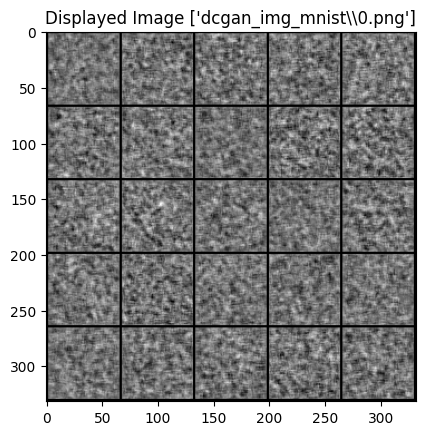

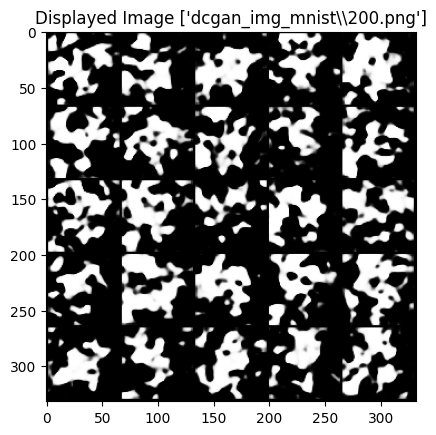

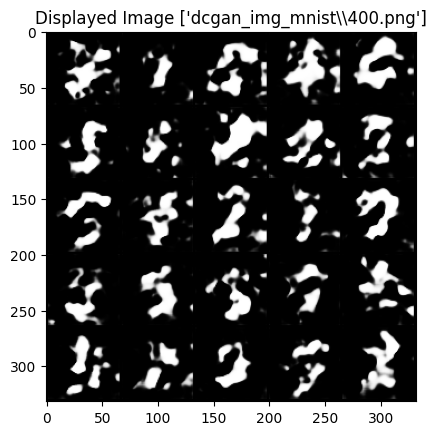

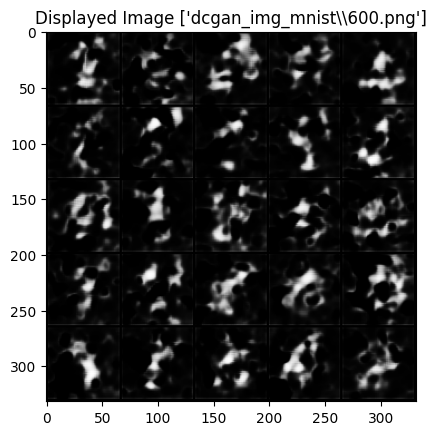

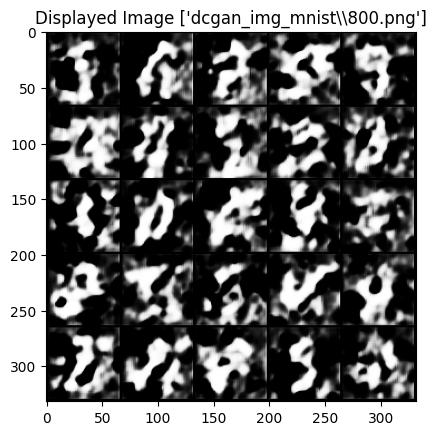

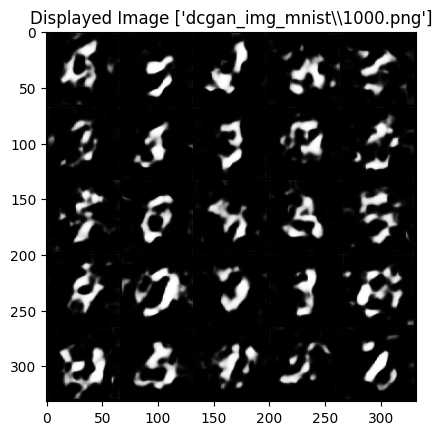

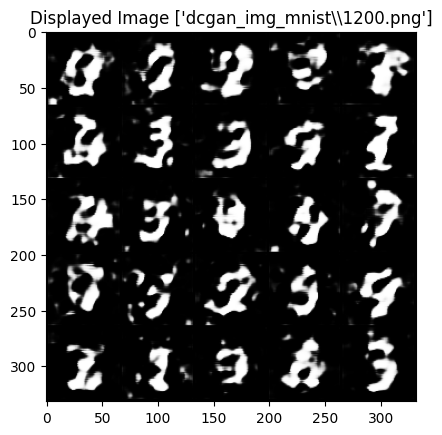

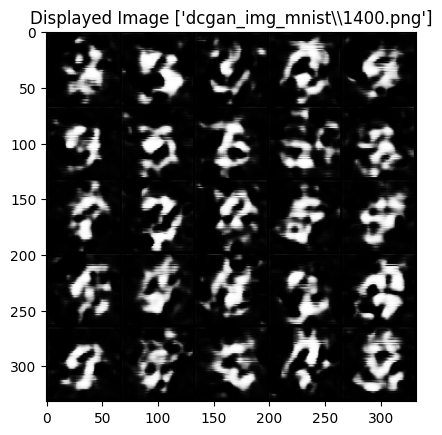

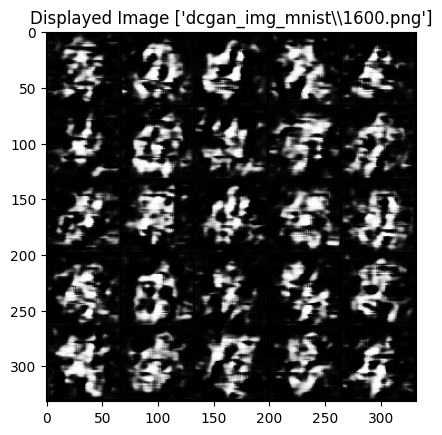

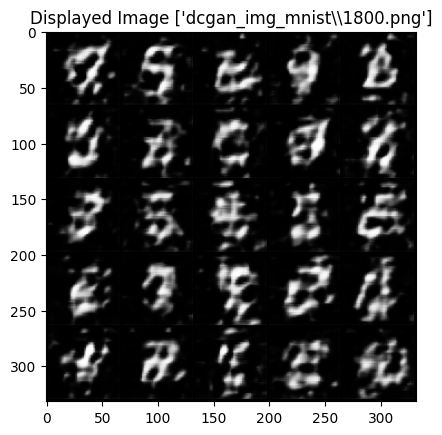

In [13]:
import cv2
import matplotlib.pyplot as plt

loaded_images = []

for path in image_list:
   img = cv2.imread(path)

   if img is None:
      print(f"경로에 오류가 있어 파일을 찾을 수 없습니다: {path}")
      continue

   img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   loaded_images.append(img_rgb)


for i in range(len(loaded_images)):
    plt.figure()

    plt.imshow(loaded_images[i])
    plt.title(f'Displayed Image {image_list[i].split('/')}')